In [ ]:
# download datasets menggnakan widget
!wget --no-check-certificate \
  https://raw.githubusercontent.com/reski-mulud-muchamad/dataset/main/kaggle_movie_train.csv \
  -O movie_genre.csv

--2021-06-11 19:41:02--  https://raw.githubusercontent.com/reski-mulud-muchamad/dataset/main/kaggle_movie_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22936196 (22M) [text/plain]
Saving to: ‘movie_genre.csv’

movie_genre.csv     100%[===================>]  21.87M  34.6MB/s    in 0.6s    

2021-06-11 19:41:03 (34.6 MB/s) - ‘movie_genre.csv’ saved [22936196/22936196]



In [ ]:
# import modul
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('movie_genre.csv')
df.tail()

,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


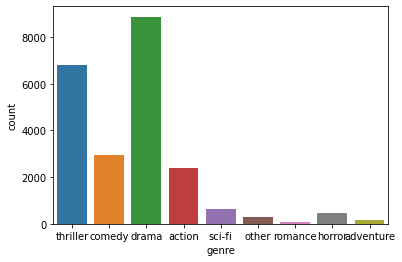

In [ ]:
sns.countplot(df['genre'])

In [ ]:
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
# balancing
balance_size = 3000
 
drama = df[df['genre'] == 'drama']
comedy = df[df['genre'] == 'comedy']
action = df[df['genre'] == 'action']
 
balance_df = drama[:balance_size]
balance_df = balance_df.append(comedy)
balance_df = balance_df.append(action)
 
balance_df

,id,text,genre
2,3,"up Come, I have a surprise.... She takes him ...",drama
4,5,"nd dismounts, just as the other children reach...",drama
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
10,12,ng nasty now. Percy starts to play an old reli...,drama
11,14,maps you know. Swines. Before the war we help...,drama
...,...,...,...
22541,28122,"ng on it. Obviously, as a final gesture, he se...",action
22550,28131,e places a hand on Paul's shoulder. We see the...,action
22555,28139,D AL echoes Joe. AL VO Oh my God...What did he...,action
22566,28152,"BUT THEN YOU KNEW THAT. Inhaling some bliss, S...",action


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


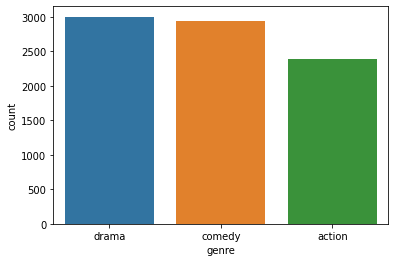

In [ ]:
 sns.countplot(balance_df['genre'])

In [ ]:
# one heat encoding
genre = pd.get_dummies(balance_df.genre)
new_df = pd.concat([balance_df, genre], axis=1)
new_df = new_df.drop(columns=['id', 'genre'])
 
print('Jumlah sample : ', len(new_df))
new_df.head()

Jumlah sample :  8333


,text,action,comedy,drama
2,"up Come, I have a surprise.... She takes him ...",0,0,1
4,"nd dismounts, just as the other children reach...",0,0,1
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,0,0,1
10,ng nasty now. Percy starts to play an old reli...,0,0,1
11,maps you know. Swines. Before the war we help...,0,0,1


In [ ]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
 
puncts = string.punctuation
replace_puncts = {'`': "'", '′': "'", '“':'"', '”': '"', '‘': "'"}
 
strip_chars = [',', '.', '"', ':', ')', '(', '-', '|', ';', "'", '[', ']', '>', '=', '+', '\\', '•',  '~', '@', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', '£']
 
print(sw)
 
custom_sw = list(set([word.replace("'", "") for word in sw]))
print(custom_sw)
 
sw = custom_sw+sw
sw = list(set(sw))
sw.sort()
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def cleanText(text):
  text = str(text)
  text_sw = [word.lower() for word in text.split() if word.lower() not in sw and len(word.lower()) > 2]  #  
  text_sw = " ".join(text_sw)
 
  x = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", text_sw)
  
  for key, value in replace_puncts.items():
    x = x.replace(key, f' {value} ')
 
  for punct in strip_chars:
    x = x.replace(punct, ' ') 
    
  for punct in puncts:
    x = x.replace(punct, f' {punct} ')
  
  x = x.replace(" '", " ")
  x = x.replace("' ", " ")
  x = x.strip()
  return x
 
def lemmatizeWord(text):    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)
 
def textProcessing(X):
    X = X.apply(cleanText)
    X = X.apply(lemmatizeWord)
    return X

In [ ]:
text = textProcessing(new_df['text'].astype(str))
text = text.values
labels = new_df[['drama', 'comedy', 'action']].values
 
text

array(['come surprise take hand lead hallway salvatore look feel pang seems smaller age withers body slightly stooped hair gathered knot back head must tired want rest there s time funeral salvatore interrupting no mamma take hour air know maria smiling ironically tell now year ! salvatore get message feel guilty thinking it seems incredible never come before maria open door step aside let son in whisper put thing here in in salvatore lake step flabbergasted sight old room perfectly reconstructed preserved look like museum museum past despite bed clothes cupboard book shelf perfectly clear one ever lived',
       'dismount child reach him throw arm embracing him charlotte hurry behind them martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin s house partially rebuilt habitable workshop already completed martin s child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant 

In [ ]:
# pisahkan data train dan test
text_train, text_test, label_train, label_test = train_test_split(text, labels, test_size=0.2, random_state=2)

In [ ]:
# tokenization
num_words = balance_size
max_len = 200
tokenizer = Tokenizer(num_words=num_words, oov_token='<oov>')
 
tokenizer.fit_on_texts(text_train)
# tokenizer.fit_on_texts(text_test)
 
tokenizer.word_index = {e:i for e, i in tokenizer.word_index.items() if i <= num_words}
word_index = tokenizer.word_index
print(word_index)
print(len(word_index))
 
sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sequence_train, padding='post', maxlen=max_len, truncating='post')
padded_test = pad_sequences(sequence_test, padding='post', maxlen=max_len, truncating='post')

{'<oov>': 1, 's': 2, 'i': 3, 'look': 4, 'back': 5, 'int': 6, 'it': 7, 'one': 8, 'get': 9, 'm': 10, 'see': 11, 'like': 12, 'know': 13, 'day': 14, 'you': 15, 'him': 16, 'that': 17, 'door': 18, 'ext': 19, 'hand': 20, 'room': 21, 'night': 22, 'take': 23, 'come': 24, 'man': 25, 'turn': 26, 'around': 27, 'right': 28, 'me': 29, 'two': 30, 'time': 31, 'head': 32, 'he': 33, 'll': 34, 'got': 35, 't': 36, 'want': 37, 'eye': 38, 'up': 39, 'open': 40, 'think': 41, 'we': 42, 'o': 43, 'face': 44, 'there': 45, 'd': 46, 'away': 47, 'going': 48, 're': 49, 'mr': 50, 'cut': 51, 'well': 52, 'what': 53, 'car': 54, 'start': 55, 'her': 56, 'little': 57, 'close': 58, 'here': 59, 'say': 60, 'go': 61, 'make': 62, 'let': 63, 'no': 64, 'shot': 65, 'good': 66, 'walk': 67, 'out': 68, 've': 69, 'move': 70, 'way': 71, 'something': 72, 'can': 73, 'behind': 74, 'looking': 75, 'stand': 76, 'still': 77, 'pull': 78, 'stop': 79, 'them': 80, 'thing': 81, 'voice': 82, 'another': 83, 'toward': 84, 'smile': 85, 'guy': 86, 'yes'

In [ ]:
test_token = []
text_in = input('Masukan teks : ')
test_token.append(text_in)
print(tokenizer.texts_to_sequences(test_token))

Masukan teks : A war has come from the other side
[[420, 785, 1, 24, 1671, 715, 390, 104]]


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(num_words, 16, input_length=max_len),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, recurrent_dropout=0.5)),
                             tf.keras.layers.Dropout(0.5),
                             
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dropout(0.5),
                             
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3, activation='softmax')])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00146, name='Adam'),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 16)           48000     
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          41472     
_________________________________________________________________
dropout (Dropout)            (None, 200, 128)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback) :
  
  def on_epoch_end(self, epoch, logs={}) :
    if logs.get('accuracy') > 0.95 :
      print('\nAkurasi sudah mencapai 95%!')
      self.model.stop_training = True
 
callback = myCallback()

In [ ]:
history = model.fit(padded_train, label_train,
                    validation_data=(padded_test, label_test),
                    epochs=50,
                    batch_size=64,
                    steps_per_epoch=50,
                    callbacks=callback)

Epoch 1/50
50/50 [==============================] - 33s 568ms/step - loss: 1.0957 - accuracy: 0.3631 - val_loss: 1.0958 - val_accuracy: 0.3473
Epoch 2/50
50/50 [==============================] - 28s 556ms/step - loss: 1.0583 - accuracy: 0.4066 - val_loss: 0.9816 - val_accuracy: 0.4925
Epoch 3/50
50/50 [==============================] - 28s 554ms/step - loss: 0.8566 - accuracy: 0.5903 - val_loss: 0.7347 - val_accuracy: 0.7349
Epoch 4/50
50/50 [==============================] - 28s 559ms/step - loss: 0.5586 - accuracy: 0.7706 - val_loss: 0.5861 - val_accuracy: 0.8338
Epoch 5/50
50/50 [==============================] - 28s 555ms/step - loss: 0.3905 - accuracy: 0.8668 - val_loss: 0.4482 - val_accuracy: 0.8572
Epoch 6/50
50/50 [==============================] - 28s 561ms/step - loss: 0.3051 - accuracy: 0.8909 - val_loss: 0.3791 - val_accuracy: 0.8824
Epoch 7/50
50/50 [==============================] - 28s 554ms/step - loss: 0.2441 - accuracy: 0.9142 - val_loss: 0.3142 - val_accuracy: 0.8908

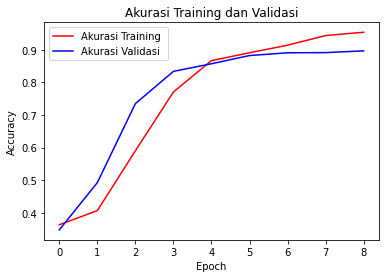

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r', label='Akurasi Training ')                 
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.figure()                                                                      
plt.show()

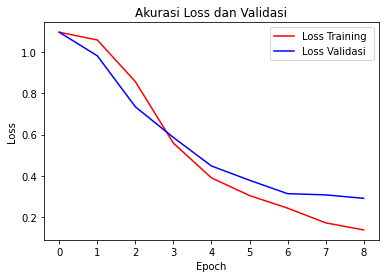

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(loss))
 
plt.plot(epochs, loss, 'r', label='Loss Training ')                 
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Akurasi Loss dan Validasi')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.figure()                                                                      
plt.show()